# Qualification Notebook

Welcome!  If you've gotten this far, then you have successfully built and configured your python environment.  In this notebook, you'll be asked do some data science problem solving in order to show off your ability and aptitude.  To do so, you'll be asked to write code for the TODO's in order to train, evaluate, and deploy a model as an API, and consume the API.

Keep in mind that this notebook will serve as a work product, but you'll also need to talk through this - so be prepared to explain what you did and why.

### Load Data

In the below cell, write the neccessary code in the TODO to load the boston housing data packaged with sklearn, split into train and test sets and print the shapes of the tensors loaded.  Be prepared to explain why you would want to split available data into a training and test set.

In [8]:
from sklearn.datasets import load_boston

###   TODO   ###
import pandas as pd
from sklearn.model_selection import train_test_split

boston = load_boston()
x_df = pd.DataFrame(boston.data, columns=boston.feature_names)
y_df = pd.DataFrame(boston.target, columns=["target"])

x_train, x_test, y_train, y_test = train_test_split(
    x_df, y_df, test_size=0.2
)

print("trianing count, testing count")
print(x_train.shape)

print("\n preview of test data:")
print(x_train.head(3))

################

trianing count, testing count
(404, 13)

 preview of test data:
        CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
491  0.10574   0.0  27.74   0.0  0.609  5.983   98.8  1.8681  4.0  711.0   
8    0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
62   0.11027  25.0   5.13   0.0  0.453  6.456   67.8  7.2255  8.0  284.0   

     PTRATIO       B  LSTAT  
491     20.1  390.11  18.07  
8       15.2  386.63  29.93  
62      19.7  396.90   6.73  


### Preprocess

In the cell below, scale the input features so that they all have a mean of 0 and standard deviation of 1.  Be prepared to explain why you might perform this kind of preprocessing.

In [9]:
###   TODO   ###
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

### transfrom both training and test data ###
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_normal = pd.DataFrame(x_train_scaled)
x_test_normal = pd.DataFrame(x_test_scaled)


# check results
print(x_train_normal.mean(axis = 0)) # should be ecesintial zero
print(x_train_normal.std(axis = 0))  # should be 1

################

0     1.805486e-16
1     7.502250e-17
2     1.602266e-15
3    -1.585640e-16
4    -8.391252e-15
5    -1.047072e-14
6    -2.781054e-16
7     8.208505e-16
8     1.640602e-16
9     1.731975e-16
10    2.473819e-14
11    1.015428e-14
12    1.869585e-15
dtype: float64
0     1.00124
1     1.00124
2     1.00124
3     1.00124
4     1.00124
5     1.00124
6     1.00124
7     1.00124
8     1.00124
9     1.00124
10    1.00124
11    1.00124
12    1.00124
dtype: float64


### Train Baseline Model(s)

In the following cell, complete the TODO to define and train a base model to predict housing prices in Boston.  Be prepared to explain tradeoffs in deciding between model types.  Also, be prepared to explain your choice of model and a bit about how and why it works.

In [10]:
###   TODO   ###
from sklearn.linear_model import LinearRegression
from sklearn import metrics

model = LinearRegression()
model.fit(x_train_normal, y_train)

model_rawData = LinearRegression()
model_rawData.fit(x_train, y_train)
 
################

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Evaluate Baseline Model(s)

Measure the performance of the baseline model(s) on the data.  Be prepared to discuss alternate ways of measuring model performance and how you chose a model to tune further.

In [11]:
###   TODO   ###
import numpy as np 

predictedValue = model.predict(x_train_normal)
predictedValue_rawData = model_rawData.predict(x_train)

print("given data")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, predictedValue_rawData))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, predictedValue_rawData))  # want to be as small as posible
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, predictedValue_rawData)))

print("\n ----------------- \n")
print("normalized data")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, predictedValue))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, predictedValue))  # want to be as small as posible
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, predictedValue)))

################

given data
Mean Absolute Error: 3.131806290595673
Mean Squared Error: 20.22996673015139
Root Mean Squared Error: 4.497773530331578

 ----------------- 

normalized data
Mean Absolute Error: 3.131806290595688
Mean Squared Error: 20.22996673015139
Root Mean Squared Error: 4.497773530331578


### Select Best Hyperparameters

In the following cell, complete the TODO to select the best hyperparameters for the model you defined and evaluated as a baseline earlier.  Be prepared to explain why you made the choices you did in terms of selecting the best parameters.

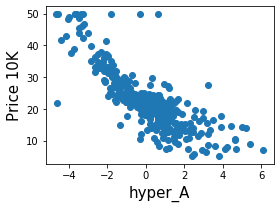

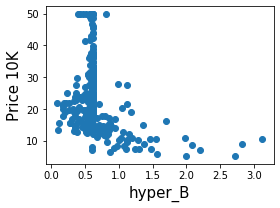

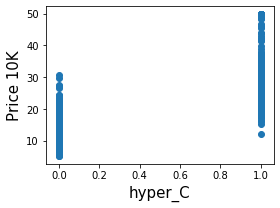

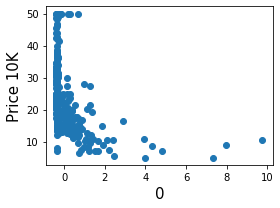

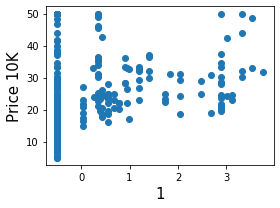

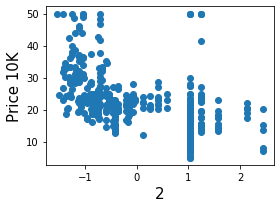

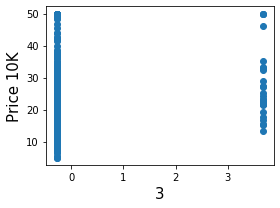

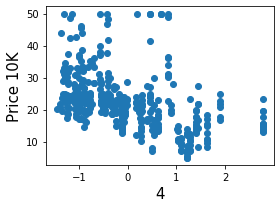

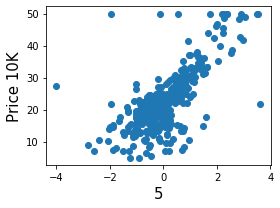

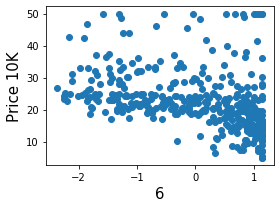

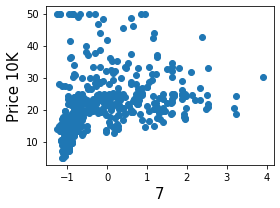

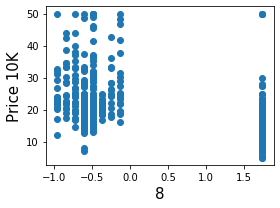

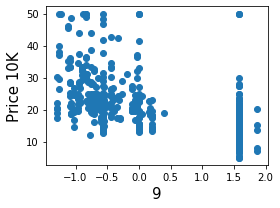

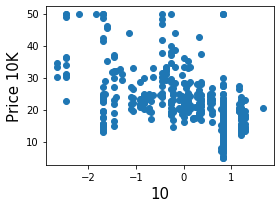

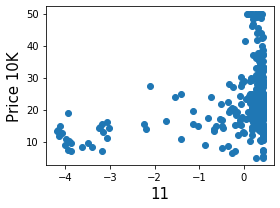

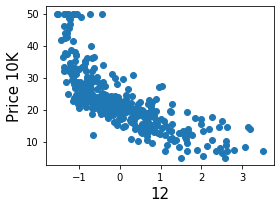

In [12]:
###   TODO   ###
import matplotlib.pyplot as plt
import math
## hyyperparameters    
x_train_weighted = x_train_normal.copy()

x_train_weighted['hyper_A'] = (x_train_normal[12]-x_train_normal[5])
x_train_weighted['hyper_B'] = x_train_normal[0].apply(abs).apply(math.sqrt)
x_train_weighted['hyper_C'] = x_train_normal[12] < 0


## Create Charts 
for index, feature_name in enumerate(['hyper_A','hyper_B','hyper_C']):
    plt.figure(figsize=(4, 3))
    plt.scatter(x_train_weighted[feature_name], y_train)
    plt.ylabel('Price 10K', size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()
    
for index, feature_name in enumerate([0,1,2,3,4,5,6,7,8,9,10,11,12]):
    plt.figure(figsize=(4, 3))
    plt.scatter(x_train_normal[feature_name], y_train)
    plt.ylabel('Price 10K', size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()
    


################

# Evaluate Model

Measure the performance of the model on the data and then save the model as 'model.pkl' to the current working directory.  Be prepared to discuss alternate ways of measuring model performance.

In [13]:
x_train_weighted.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,hyper_A,hyper_B
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,404.000000
mean,1.805486e-16,7.502250e-17,1.602266e-15,-1.585640e-16,-8.391252e-15,-1.047072e-14,-2.781054e-16,8.208505e-16,1.640602e-16,1.731975e-16,2.473819e-14,1.015428e-14,1.869585e-15,1.239802e-14,0.652428
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.793285e+00,0.313114
min,-3.881073e-01,-5.016202e-01,-1.547783e+00,-2.728884e-01,-1.449787e+00,-4.002254e+00,-2.369591e+00,-1.261955e+00,-9.629337e-01,-1.295840e+00,-2.660319e+00,-4.195266e+00,-1.541681e+00,-4.658882e+00,0.084727
25%,-3.797815e-01,-5.016202e-01,-8.574308e-01,-2.728884e-01,-9.034673e-01,-5.983914e-01,-8.241848e-01,-8.207168e-01,-6.101297e-01,-7.542059e-01,-6.390405e-01,1.873558e-01,-7.999485e-01,-1.091488e+00,0.582537
50%,-3.632233e-01,-5.016202e-01,-2.006476e-01,-2.728884e-01,-1.490253e-01,-1.373453e-01,2.972763e-01,-2.698249e-01,-4.925284e-01,-4.352437e-01,1.878461e-01,3.666344e-01,-1.912561e-01,1.286009e-01,0.613074
75%,-6.457260e-02,3.484409e-01,1.026807e+00,-2.728884e-01,6.227603e-01,4.699663e-01,9.105470e-01,6.421908e-01,-1.397244e-01,1.586856e+00,8.309801e-01,4.165682e-01,6.112738e-01,1.040827e+00,0.620036
max,9.752883e+00,3.748685e+00,2.433783e+00,3.664502e+00,2.764682e+00,3.612302e+00,1.148790e+00,3.898084e+00,1.741897e+00,1.857673e+00,1.657867e+00,4.207584e-01,3.500953e+00,6.105479e+00,3.122961


In [14]:
###   TODO   ###
import pickle

model_withHyper = LinearRegression()
model_withHyper.fit(x_train_weighted, y_train)

predictedValue = model_withHyper.predict(x_train_weighted)

print("Results after added columns")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, predictedValue))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, predictedValue))  # want to be as small as posible
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, predictedValue)))

# Saving model to disk
pickle.dump(model_withHyper, open('model.pkl','wb'))

################

Results after added columns
Mean Absolute Error: 3.1173769731863294
Mean Squared Error: 20.10186016110521
Root Mean Squared Error: 4.483509803837303


# Deploy Model as API

Write the web service API to expose the model as an API, where consumers transmit model inputs and the service collects them, performs inference, and returns results.  Be prepared to explain why this isn't quite a production deployment.

In [15]:
%%writefile app.py

###   TODO   ###
import numpy as np
from flask import Flask, request, jsonify
import pickle
from pandas import DataFrame
import pandas as pd
import math

app = Flask(__name__)
# Load the model
model = pickle.load(open('model.pkl','rb'))

@app.route('/predict',methods=['POST'])
def predict():
    # Get the data from the POST request.
    data = request.get_json(force=True)
    
    asDf = pd.read_json(data['payload'])
    
    ## add Hyper columns to test data
    asDfHyper = asDf.copy()
    
    asDfHyper['hyper_A'] = (asDf[12]-asDf[5])
    asDfHyper['hyper_B'] = asDf[0].apply(abs).apply(math.sqrt)
    asDfHyper['hyper_C'] = asDf[12] < 0
            
    prediction = model.predict(asDfHyper)
    
    # Take the first value of prediction
    output = prediction[0][0]
    return jsonify({'prediction (10k): ': output })

if __name__ == '__main__':
    app.run(port=8081, debug=True)

################

Overwriting app.py


# Test the Deployment

Write some code to test that the deployment was successful, that is, send the running service a house from the test set and verify the service returns predictions.  Be prepared to explain what other endpoints might be useful for a production deployment.

Make sure you start the service before attempting to call it!

In [16]:
import requests 

url = 'http://localhost:8081/predict'
def test(testIndex):
    testDf = x_test_normal.iloc[testIndex:10]
    actual = y_test.iloc[testIndex:10]
    
    payload = testDf.to_json()

    r = requests.post(url,json={'payload': payload})
    
    print('Test Data index: ', testIndex)
    print('actual (10k):', actual.target.values[0],' -- results from API:', r.json())
    print('\n')
    

In [18]:
# Test
test(1)
test(2)
test(3)
test(4)
test(5)

Test Data index:  1
actual (10k): 11.8  -- results from API: {'prediction (10k): ': 10.976826363306268}


Test Data index:  2
actual (10k): 24.2  -- results from API: {'prediction (10k): ': 25.229914283451016}


Test Data index:  3
actual (10k): 50.0  -- results from API: {'prediction (10k): ': 42.72850300599853}


Test Data index:  4
actual (10k): 44.8  -- results from API: {'prediction (10k): ': 38.91449154562232}


Test Data index:  5
actual (10k): 19.9  -- results from API: {'prediction (10k): ': 20.065662191151304}


